In [1]:
from tkinter import filedialog
from tkinter import *
def select_path(title):
    root = Tk()
    root.withdraw()
    path = filedialog.askdirectory(title = title)
    return path

/home/invitado/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/invitado/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/invitado/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/invitado/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

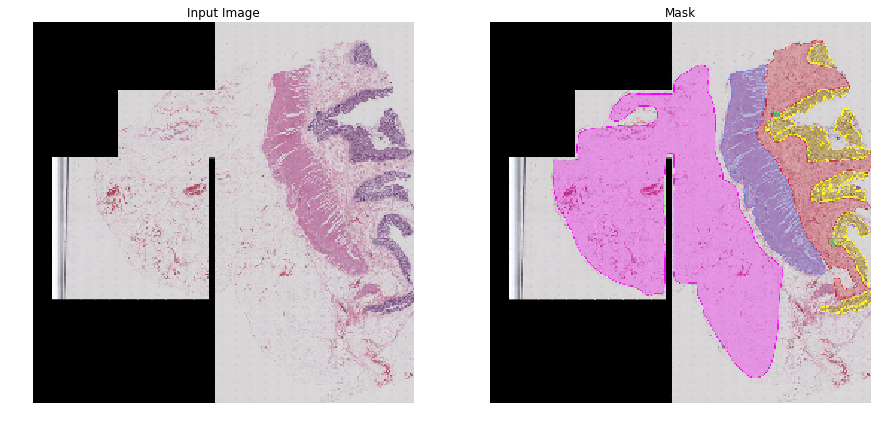

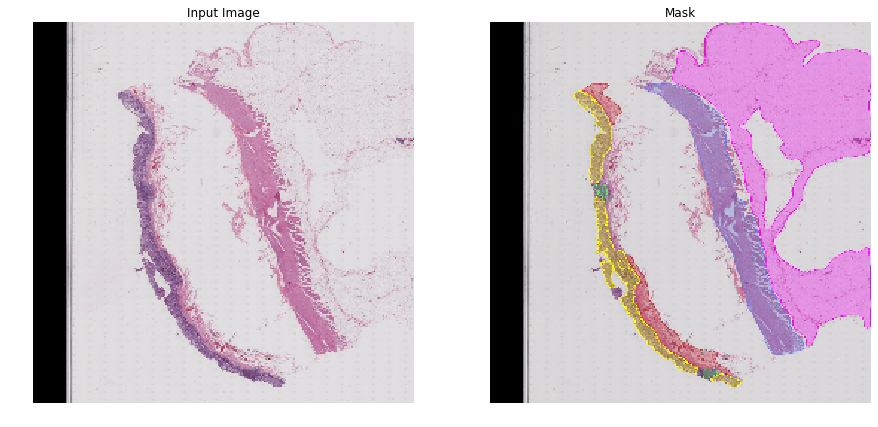

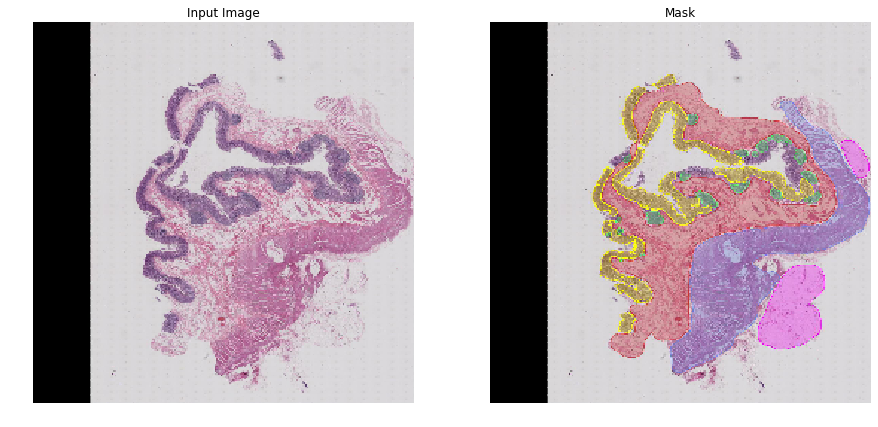

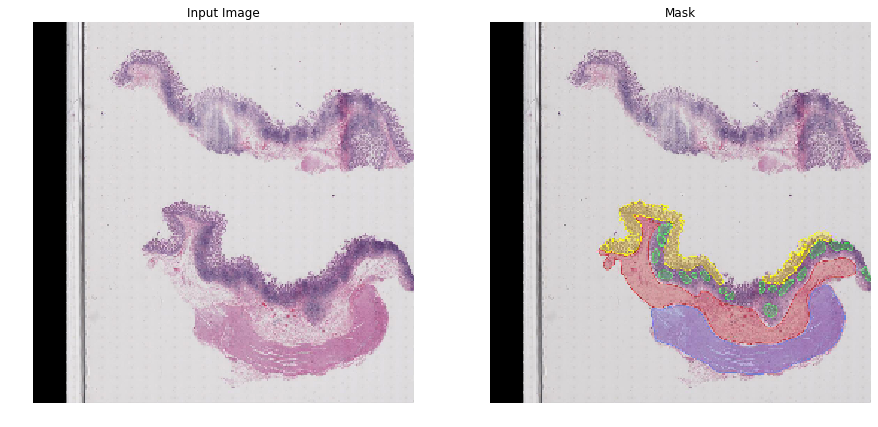

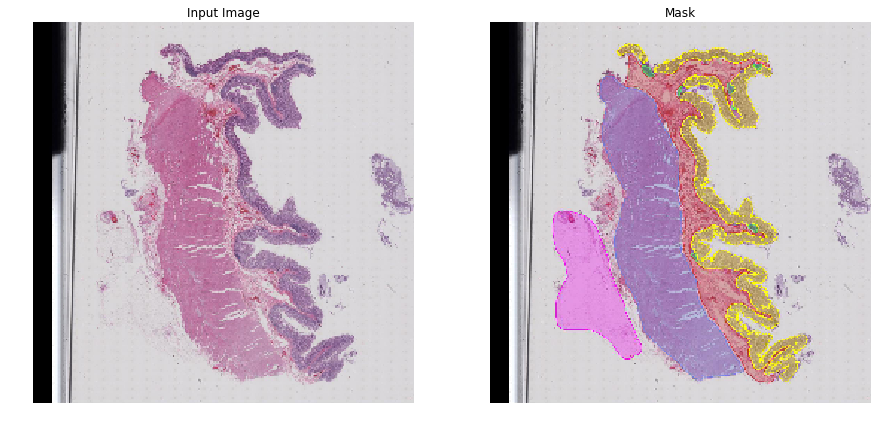

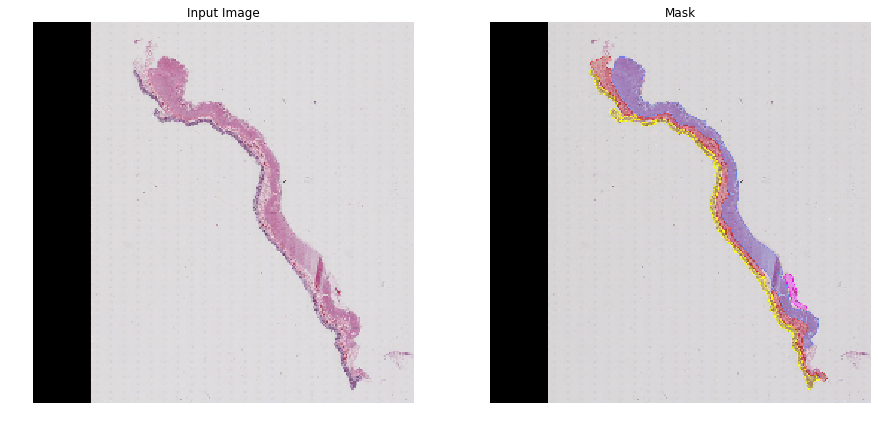

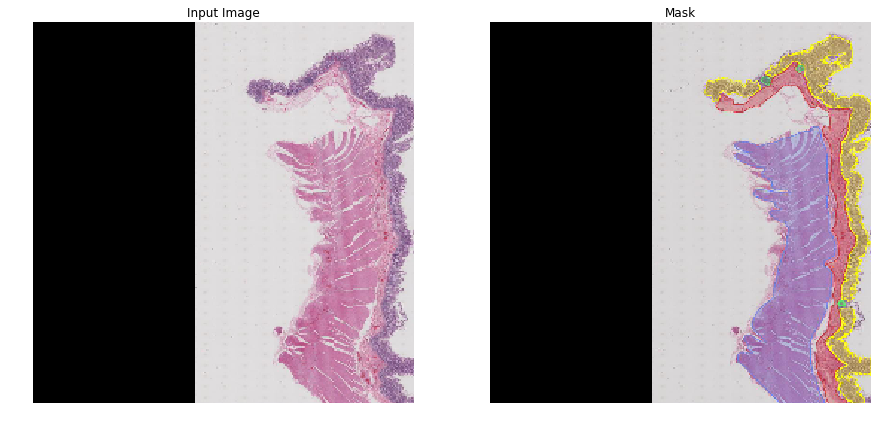

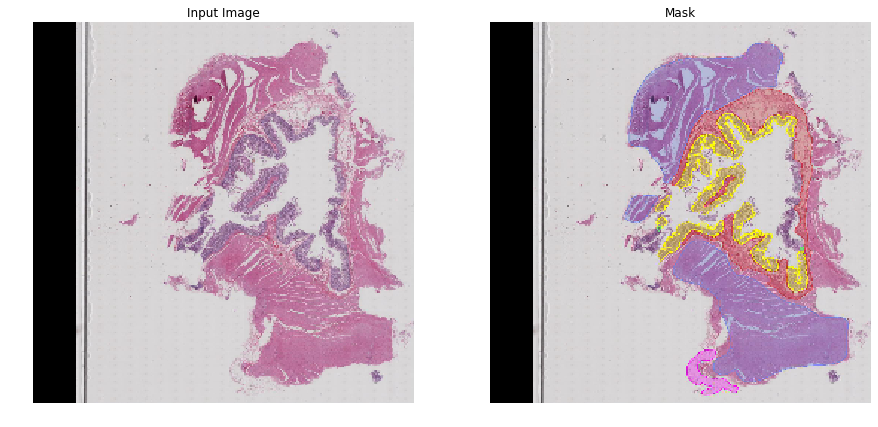

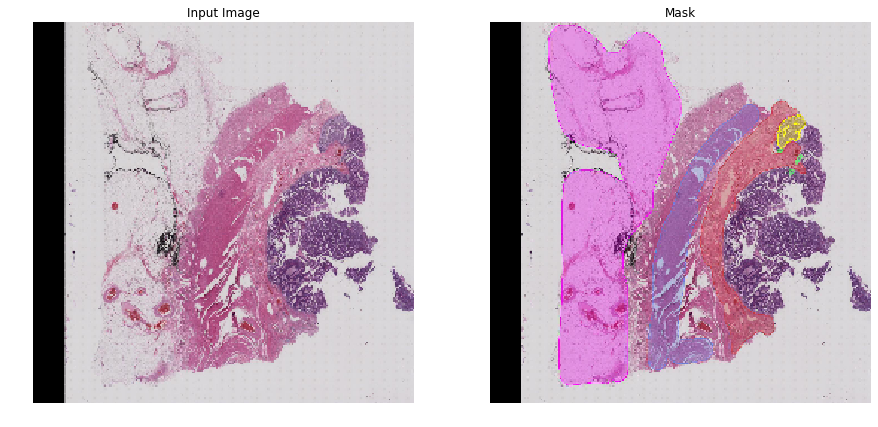

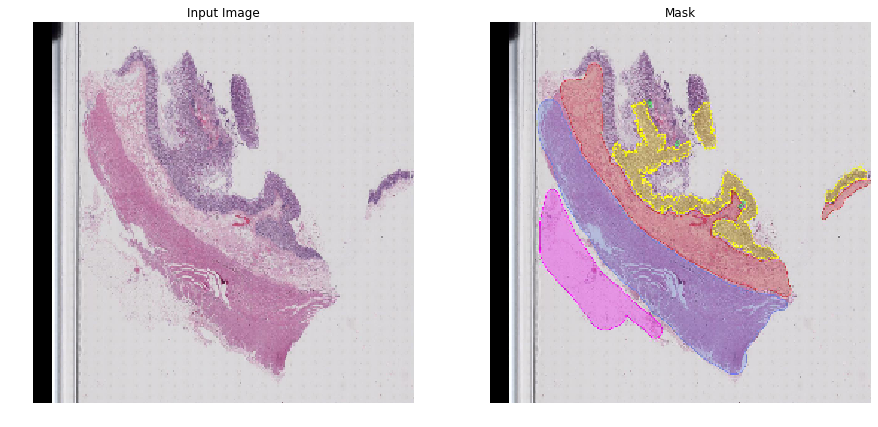

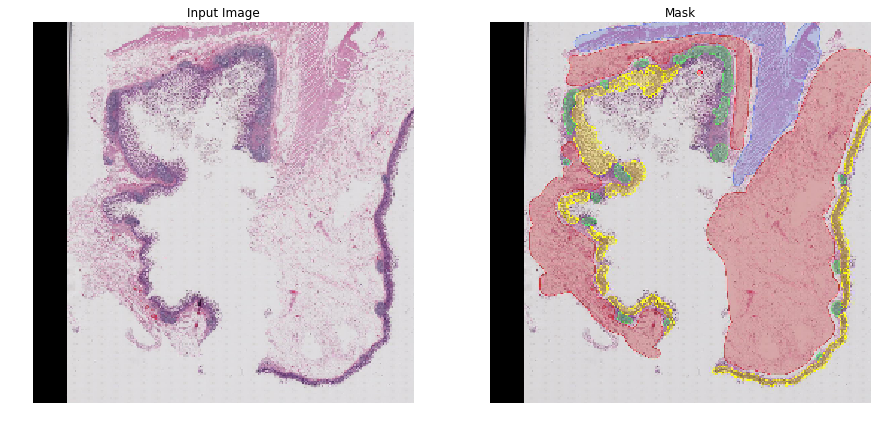

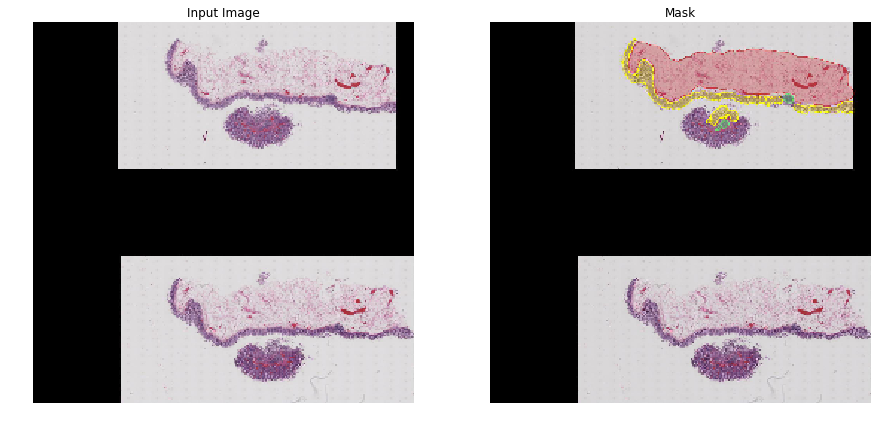

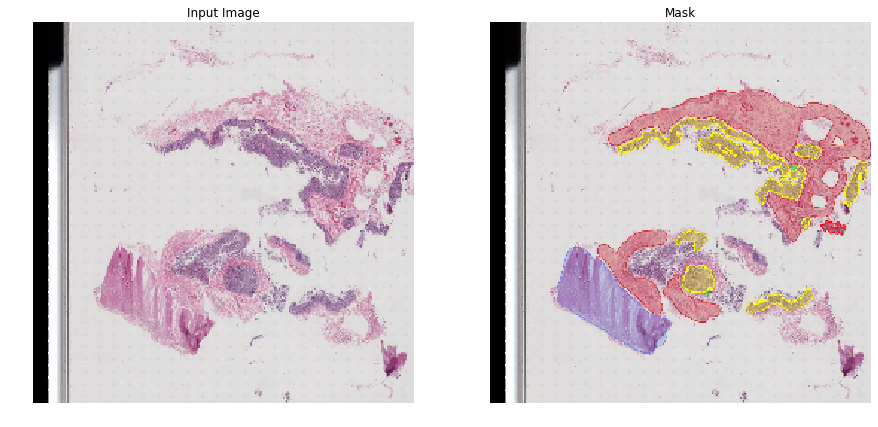

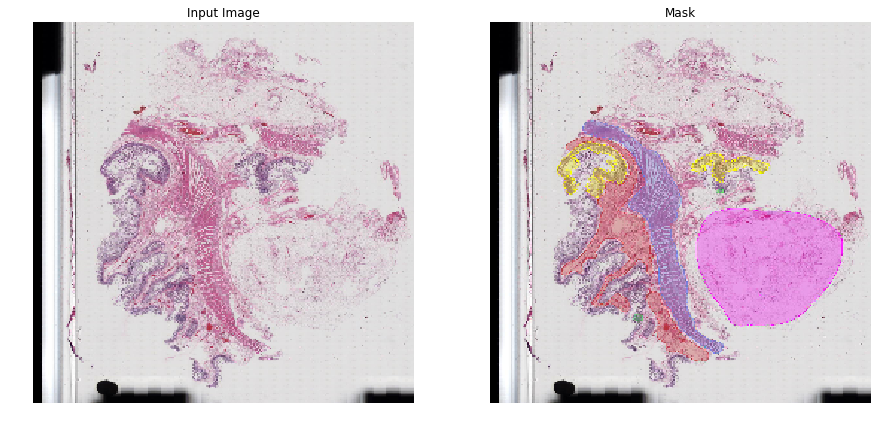

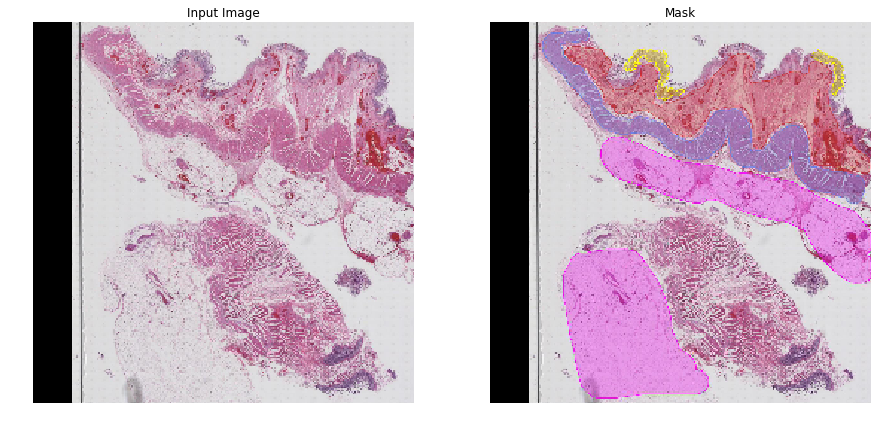

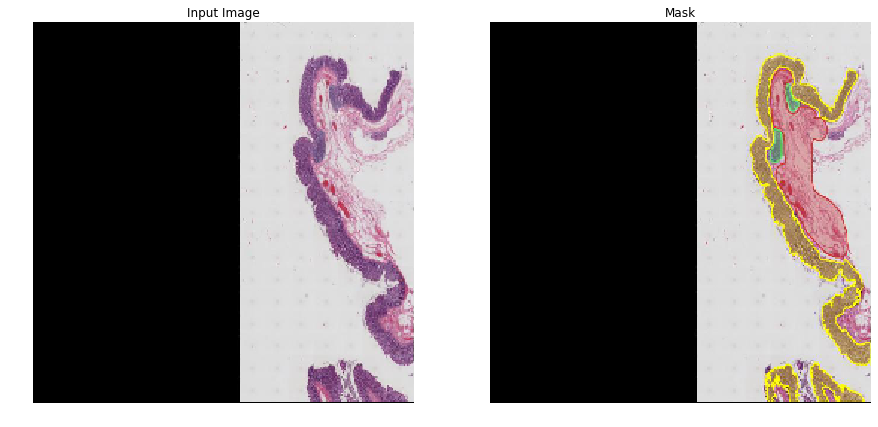

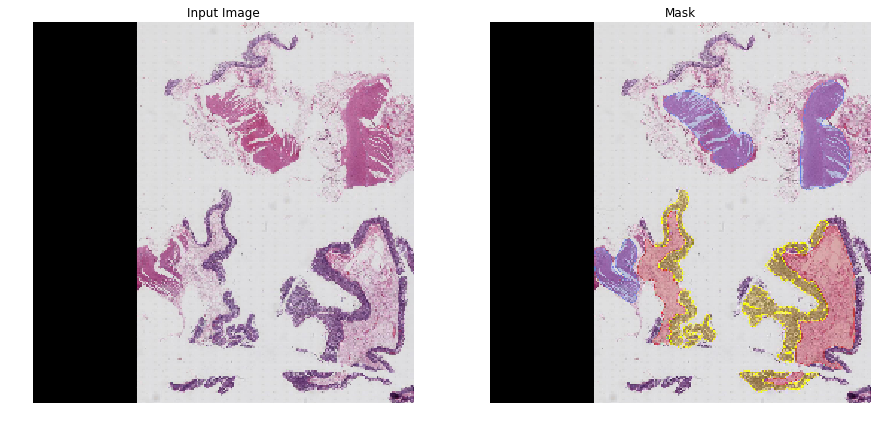

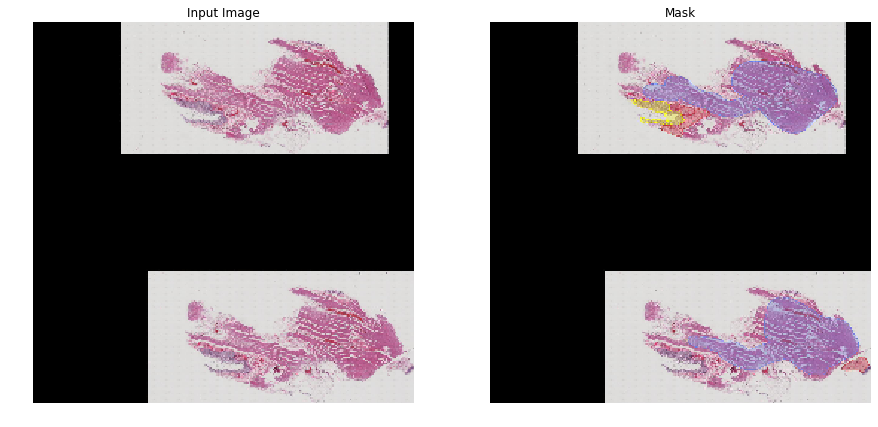

In [2]:
#version "manual"

import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
%matplotlib inline

#images_path = None
images_path = 'DB/prueba'
ACCEPTABLE_IMAGE_FORMATS = [".jpg", ".jpeg", ".png", ".bmp", ".bif"]
img_height = 256
img_width = 256


def display_pair(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    img = array_to_img(display_list[i])
    plt.imshow(img)
    plt.axis('off')
  plt.show()



def get_image(path):
    img = load_img(path, target_size=(img_height, img_width))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(img_height, img_width, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img


def load_data():
    #load all the images in a list
    for dir_entry in os.listdir(images_path+'/train_images/'):
        if os.path.splitext(dir_entry)[1] in ACCEPTABLE_IMAGE_FORMATS:
            train_x.append(get_image(images_path+'/train_images/'+dir_entry))

    #load all the annotations in a list
    for dir_entry in os.listdir(images_path+'/train_annotations/'):
        if os.path.splitext(dir_entry)[1] in ACCEPTABLE_IMAGE_FORMATS:
            train_y.append(get_image(images_path+'/train_annotations/'+dir_entry))
  
    return train_x, train_y




train_x = []
train_y = []

if images_path == None: images_path = select_path('Pick the folder containing the training data')
train_x, train_y = load_data() 

for (x, y) in zip(train_x, train_y):
        display_pair([x, y])


Found 18 images belonging to 1 classes.
Found 18 images belonging to 1 classes.
Data shape:  (256, 256, 3) float32


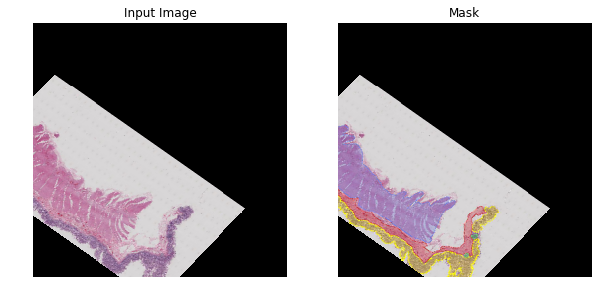

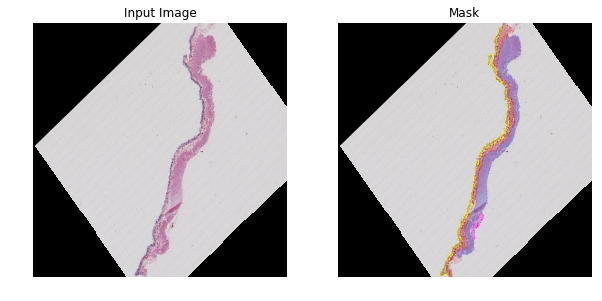

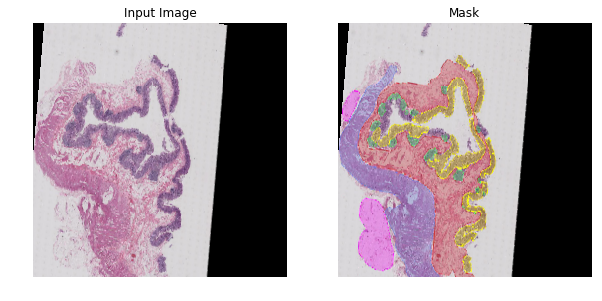

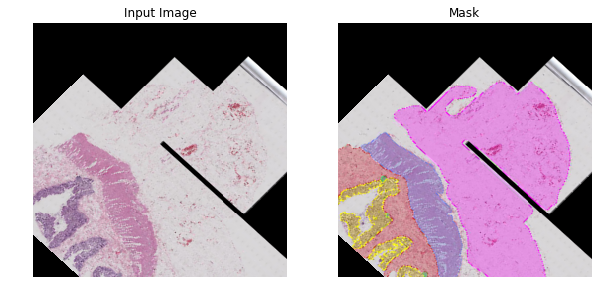

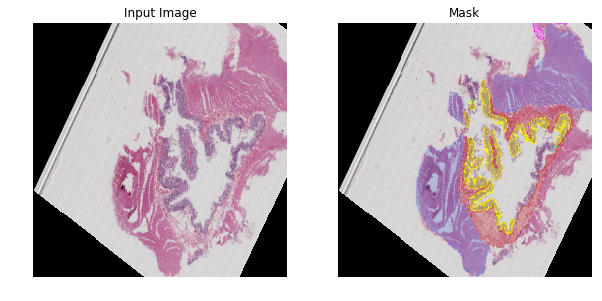

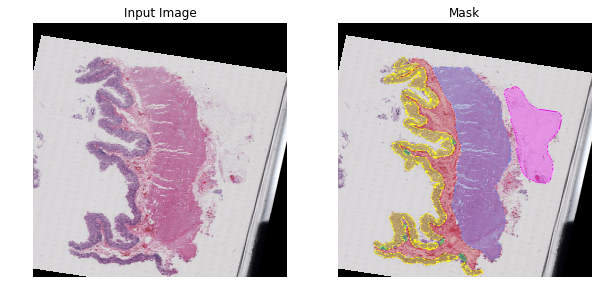

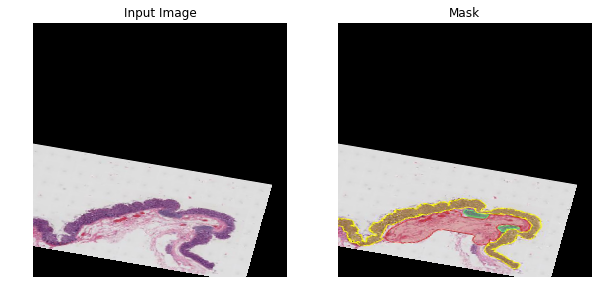

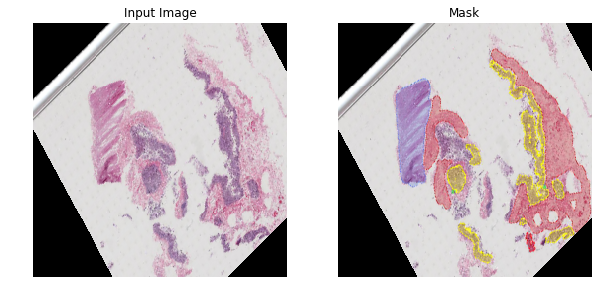

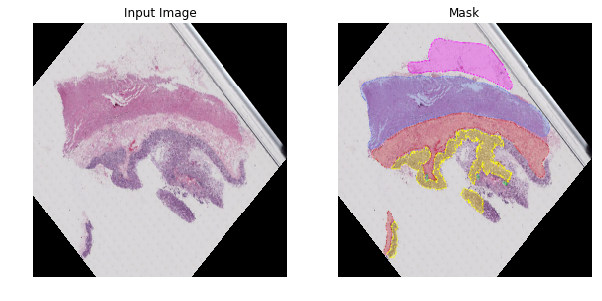

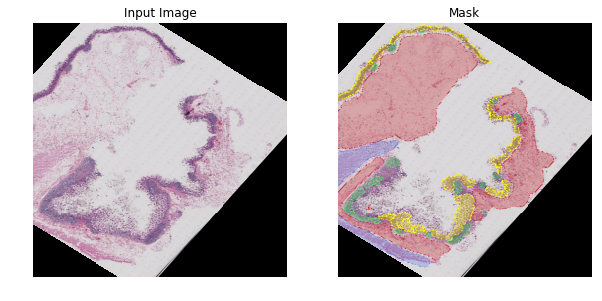

In [3]:
#version keras data augmentation ordenado

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random


images_dir = 'DB/prueba2/train_images'
annotations_dir = 'DB/prueba2/train_annotations'
batch_size = 32
img_height = 256
img_width = 256
seed = random.randint(0, 100)

def get_generator(images_dir, annotations_dir, augmentation=True):
    """
    Returns a pair of generators from the received paths.
    :param images_dir, annotations_dir: paths to the target dirs
    :augmentation: boolean for making data augmentation (default=True)
    :return: image_generator, mask_generator
    """ 
    #global images_dir, annotations_dir
    
    # we create two instances with the same arguments
    if(augmentation):
        data_gen_args = dict(validation_split=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=90.,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.05,      #inclina la imagen
                             #brightness_range=None,
                             fill_mode='constant', #'constant','nearest','reflect','wrap'
                             #dtype=None,
                             #featurewise_center=True,
                             #featurewise_std_normalization=True,
                             #https://stackoverflow.com/questions/54702212/keras-rescale-1-255-vs-preprocessing-function-preprocess-input-which-one-to
                             rescale=1. / 255,  #input normalizatoin
                            )
    else: data_gen_args = dict()

    image_datagen = ImageDataGenerator(**data_gen_args) 
    mask_datagen = ImageDataGenerator(**data_gen_args)

    #https://stackoverflow.com/questions/55663880/how-to-use-featurewise-center-true-together-with-flow-from-directory-in-imagedat
    #image_datagen.fit(train, augment=True, seed=seed) 
    #mask_datagen.fit(masks, augment=True, seed=seed)
   

    image_generator = image_datagen.flow_from_directory(
        images_dir,
        class_mode=None,
        seed=seed,
        target_size=(img_height, img_width),
        batch_size=batch_size)

    mask_generator = mask_datagen.flow_from_directory(
        annotations_dir,
        class_mode=None,
        seed=seed,
        target_size=(img_height, img_width),
        batch_size=batch_size)


    # combine generators into one which yields image and masks
    #train_generator = zip(image_generator, mask_generator)
    return image_generator, mask_generator


def plot_from_generator(image_generator, mask_generator, num_plots=10):
    """
    Plots images input images and masks side by side from generator.
    :image_generator, mask_generator: image generator
    :num_plots: number of plots, can't be bigger than the available image amout (default=10)
    """ 
    import matplotlib.pyplot as plt
    %matplotlib inline

    x = image_generator.next()
    y = mask_generator.next()
    title = ['Input Image', 'Mask']
    
    print('Data shape: ', x[0].shape, x[0].dtype)


    for i in range (0, num_plots):
        f = plt.figure(figsize = (10, 10))
        f.add_subplot(1,2, 1)
        plt.title(title[0])
        plt.imshow(x[i])
        plt.axis('off')
        f.add_subplot(1,2, 2)
        plt.title(title[1])
        plt.imshow(y[i])
        plt.axis('off')
        plt.show(block=True)

    plt.show()



image_generator, mask_generator  = get_generator(images_dir, annotations_dir)
plot_from_generator(image_generator, mask_generator)


#version keras (desordenado)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#https://stackoverflow.com/questions/46572100/keras-images-with-no-subfolders


data_dir = '/media/invitado/Elements/practicas/prueba/'

batch_size = 32
img_height = 256
img_width = 256
seed = 123


# Data generators
datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = datagen.flow_from_directory(
        data_dir,#+'/train_images',
        target_size=(img_height, img_width),
        batch_size=batch_size,)

print(train_generator.filenames)
#train_generator.type

import matplotlib.pyplot as plt

for _ in range(10):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.show()
    


#version sin data augmentation

import tensorflow as tf
from tensorflow import keras

data_dir = '/media/invitado/Elements/practicas/prueba'

batch_size = 32
img_height = 256
img_width = 256
seed = 123

train_x = tf.keras.preprocessing.image_dataset_from_directory(
          data_dir+'/train_images',
          labels = None,
          #validation_split=0.2,
          #subset="training",
          #seed=seed,
          image_size=(img_height, img_width),   #resolution in wich the images are improted
          batch_size=batch_size
         )

train_y = tf.keras.preprocessing.image_dataset_from_directory(
          data_dir+'/train_annotations',
          labels = None,
          #validation_split=0.2,
          #subset="training",
          #seed=seed,
          image_size=(img_height, img_width),   #resolution in wich the images are improted
          batch_size=batch_size
         )


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images in train_x.take(1):
  for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    
plt.figure(figsize=(10, 10))
for images in train_y.take(1):
  for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")



IMG_SIZE = 256


@tf.function
def load_image(datapoint, augment=True):
    
    # resize image and mask
    print(datapoint['image'])
    print(datapoint['segmentation_mask'])

    img_orig = input_image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE))
    mask_orig = input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SIZE, IMG_SIZE))
    
    # rescale the image
    if IMAGE_CHANNELS == 1:
        input_image = tf.image.rgb_to_grayscale(input_image)
    input_image = tf.cast(input_image, tf.float32) / 255.0
    
    # augmentation
    if augment:
        # zoom in a bit
        if tf.random.uniform(()) > 0.5:
            # use original image to preserve high resolution
            input_image = tf.image.central_crop(img_orig, 0.75)
            input_mask = tf.image.central_crop(mask_orig, 0.75)
            # resize
            input_image = tf.image.resize(input_image, (IMG_SIZE, IMG_SIZE))
            input_mask = tf.image.resize(input_mask, (IMG_SIZE, IMG_SIZE))
        
        # random brightness adjustment illumination
        input_image = tf.image.random_brightness(input_image, 0.3)
        # random contrast adjustment
        input_image = tf.image.random_contrast(input_image, 0.2, 0.5)
        
        # flipping random horizontal or vertical
        if tf.random.uniform(()) > 0.5:
            input_image = tf.image.flip_left_right(input_image)
            input_mask = tf.image.flip_left_right(input_mask)
        if tf.random.uniform(()) > 0.5:
            input_image = tf.image.flip_up_down(input_image)
            input_mask = tf.image.flip_up_down(input_mask)

        # rotation in 30° steps
        rot_factor = tf.cast(tf.random.uniform(shape=[], maxval=12, dtype=tf.int32), tf.float32)
        angle = np.pi/12*rot_factor
        input_image = tfa.image.rotate(input_image, angle)
        input_mask = tfa.image.rotate(input_mask, angle)

    return input_image, input_mask

datapoint = {'image': '/home/jbohoyo/Documents/DB/prueba/train_images', 
             'segmentation_mask': '/home/jbohoyo/Documents/DB/prueba/train_annotations'}
image, mask = load_image(datapoint)


In [4]:
def select_image_to_predict(export=True):
    root = Tk()
    root.withdraw()
    path = filedialog.askopenfilename(title = 'Pick the image to predict')
    img = load_img(path,target_size=(256,256))
    img_array = img_to_array(img)
    
    display_pair([img_array, img_array])
    
    if(export): 
        print('Exporting result to path: ')
        tf.keras.preprocessing.image.save_img('bondi_beach_grayscale.jpg', img_array)

select_image_to_predict()

TypeError: expected str, bytes or os.PathLike object, not tuple